<a href="https://colab.research.google.com/github/YuannongMao01/Alpaca-images-binary-classification/blob/main/Binary-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alpaca images binary classification by CNN based on tensorflow

# Import/ Data Augmentation

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing import image

In [2]:
# conncet with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ds_path = '/content/drive/MyDrive/alpaca_dataset'

In [19]:
train_generator = ImageDataGenerator(rescale=1./255., horizontal_flip=True)
test_generator = ImageDataGenerator(rescale=1./255.,validation_split=.2)

In [20]:
train_ds = train_generator.flow_from_directory(ds_path, 
                                               classes={'not alpaca': 0, 
                                                        'alpaca': 1},
                                               batch_size = 64,
                                               class_mode='binary', 
                                               target_size = (256,256), 
                                               subset='training')

valid_ds = test_generator.flow_from_directory(ds_path, 
                                              classes={'not alpaca': 0, 
                                                        'alpaca': 1},
                                               batch_size = 64, 
                                               class_mode='binary', 
                                               target_size = (256,256), 
                                               subset='validation')

Found 327 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [21]:
train_ds.class_indices

{'alpaca': 1, 'not alpaca': 0}

# Modeling

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from tensorflow.keras import layers 
# from keras_self_attention import SeqSelfAttention
# import keras_tuner

In [23]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding='same', input_shape = ((256,256,3))))
model.add(MaxPooling2D(pool_size = (2, 2), strides=(2, 2)))

# Convolutional layer and maxpool layer 2
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2), strides=(2, 2)))

# Convolutional layer and maxpool layer 3
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2), strides=(2, 2)))

# model.add(SeqSelfAttention(attention_activation='sigmoid'))

# Flattening Operation
model.add(Flatten())

# Fully Connected layer
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(rate = 0.5))

# Output layer
model.add(Dense(units = 1,activation='sigmoid'))

In [24]:
from tensorflow.keras import metrics

model.compile(optimizer= keras.optimizers.Adam(), # optimizer=optimizers.RMSprop(lr=0.001)
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=['Accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 256)     

# Bayesian Optimization Tuner

In [ ]:
#! pip install keras-tuner

In [ ]:
# from kerastuner.tuners import BayesianOptimization

In [ ]:
# Bayesian_Optimization_Tuner = BayesianOptimization(model,
#                                                     objective='val_loss',
#                                                     max_trials=4)

# Learning Rate Schedule

In [ ]:
# from keras.callbacks import LearningRateScheduler

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

#  EarlyStopping 

In [26]:
Early_Stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=4,
                                                  min_delta=1e-4,
                                                  restore_best_weights=True)

# Train model

In [27]:
history = model.fit(
                    train_ds,
                    validation_data=valid_ds,
                    epochs=50,
                    callbacks=[Early_Stopping])

Epoch 1/50
6/6 [==============================] - 10s 2s/step - loss: 5.6035 - Accuracy: 0.5199 - precision_2: 0.4551 - auc_2: 0.5229 - val_loss: 0.6724 - val_Accuracy: 0.5692 - val_precision_2: 0.0000e+00 - val_auc_2: 0.7003
Epoch 2/50
6/6 [==============================] - 7s 1s/step - loss: 0.7118 - Accuracy: 0.4985 - precision_2: 0.3625 - auc_2: 0.4361 - val_loss: 0.6785 - val_Accuracy: 0.5692 - val_precision_2: 0.0000e+00 - val_auc_2: 0.6226
Epoch 3/50
6/6 [==============================] - 7s 1s/step - loss: 0.6826 - Accuracy: 0.5657 - precision_2: 0.0000e+00 - auc_2: 0.5475 - val_loss: 0.6659 - val_Accuracy: 0.5692 - val_precision_2: 0.0000e+00 - val_auc_2: 0.7577
Epoch 4/50
6/6 [==============================] - 7s 1s/step - loss: 0.6731 - Accuracy: 0.5657 - precision_2: 0.5000 - auc_2: 0.6145 - val_loss: 0.6562 - val_Accuracy: 0.5692 - val_precision_2: 0.0000e+00 - val_auc_2: 0.8007
Epoch 5/50
6/6 [==============================] - 7s 1s/step - loss: 0.6568 - Accuracy: 0.5872 

# Evaluation 

In [28]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'Accuracy', 'precision_2', 'auc_2', 'val_loss', 'val_Accuracy', 'val_precision_2', 'val_auc_2'])


In [29]:
def plot_history(history, epochs=50):
    acc = history.history['Accuracy']
    val_acc = history.history['val_Accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    # precision_scores = history.history['precision']
    epochs_range = range(len(history.history['loss']))
    

    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')


    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

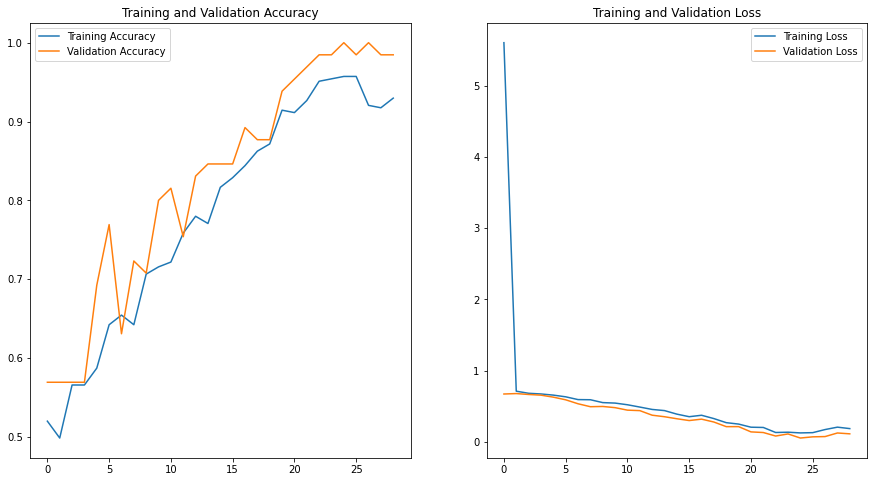

In [30]:
plot_history(history)

# Prediction

In [31]:
def predict_result(image_directory):
    test_image = image.load_img(image_directory, target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    return (result[0][0] >= 0.5).astype(np.int16)

In [32]:
predict_result('/content/drive/MyDrive/alpaca_dataset/alpaca/01ad3ff1d94eb557.jpg')

1

# Saving the Model

In [ ]:
# from keras.models import load_model

# model.save('/content/drive/MyDrive/aipaca_cnn_model') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/aipaca_cnn_model/assets


# Predict


In [ ]:
import os

def load_model():
    # TODO: replace the random model to your owns
    model = predict_result
    return model

def run(model) -> dict:
    # You should read image from data folder and return model prediction results
    # 0 represents non-alpaca
    # 1 represents alpaca
    # The return needs to be a dictionary of binaries
    results = {}
    for f in os.listdir('/content/drive/MyDrive/alpaca_dataset/not alpaca'):
      f= os.path.join('/content/drive/MyDrive/alpaca_dataset/not alpaca', f)
      results[f] = model(f)
    return results

if __name__ == '__main__':
    print(run(load_model()))

{'/content/drive/MyDrive/alpaca_dataset/not alpaca/1a28f50fd6481aba.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/1bf6f04cc03de112.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/1b95df0c40a9c76e.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/16adabd2abbebfe5.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/002bdaf1c177effd.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/0155b267ade95d1e.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/1bc054abb20af1b1.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/1a9f3772a8c6adce.jpg': 1, '/content/drive/MyDrive/alpaca_dataset/not alpaca/02d719f22cb37d9c.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/01b33e3057a05795.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/0fc535824f6e3b56.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/0df78ee76bafd3a9.jpg': 0, '/content/drive/MyDrive/alpaca_dataset/not alpaca/0f2538c208006d3d.jpg': 0, '/content/d